### Question 1

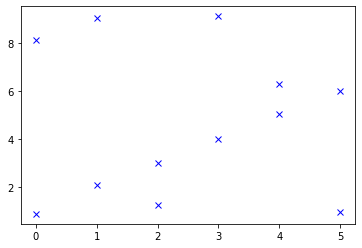

In [1]:
X = [
    [0.8970, 8.1472],
    [2.0949, 9.0579],
    [3.0307, 1.2699],
    [4.0135, 9.1338],
    [5.0515, 6.3236],
    [6.0261, 0.9754]
]
Y = [
    [1.0898, 16.8407],
    [1.9864, 17.2543],
    [2.9853, 18.8143],
    [10.0080, 19.2435],
    [8.9052, 20.9293],
    [8.0411, 11.3517]
]

import matplotlib.pyplot as plt
plt.plot(X, 'x', color="blue")

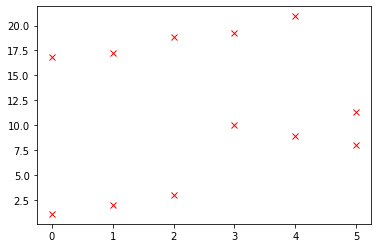

In [2]:
plt.plot(Y, 'x', color="red")

### Question 2 : centrer réduire

In [11]:
import numpy as np
from math import sqrt

X = np.array(X)
Y = np.array(Y)
matrix = {}
means = {}
centre = {}

matrix["X1"] = X[:, 0]
matrix["X2"] = X[:, 1]
matrix["Y1"] = Y[:, 0]
matrix["Y2"] = Y[:, 1]

print("X1 "+str(matrix["X1"]))
print("X2 "+str(matrix["X2"]))
print("Y1 "+str(matrix["Y1"]))
print("Y2 "+str(matrix["Y2"]))

means["X1"] = np.mean(matrix["X1"]) 
means["X2"] = np.mean(matrix["X2"])
means["Y1"] = np.mean(matrix["Y1"]) 
means["Y2"] = np.mean(matrix["Y2"])
print("MEANS : "+str(means))
centre_X1 = lambda x:x-means["X1"]
centre_X2 = lambda x:x-means["X2"]
centre_Y1 = lambda x:x-means["Y1"]
centre_Y2 = lambda x:x-means["Y2"]

centre["X1"] = centre_X1(matrix["X1"])
centre["X2"] = centre_X2(matrix["X2"])
centre["Y1"] = centre_Y1(matrix["Y1"])
centre["Y2"] = centre_Y2(matrix["Y2"])

print("X1_centre "+str(centre["X1"]))
print("X2_centre "+str(centre["X2"]))
print("Y1_centre "+str(centre["Y1"]))
print("Y2_centre "+str(centre["Y2"]))

N = len(centre['X1'])
print("N : "+str(N))

# Calcul variance
variances = {}
for i in matrix:
    tmp = np.zeros(N)
    variances[i] = 0
    count = 0
    for j in matrix[i].copy():
        tmp[count] = (j-means[i])
        r = tmp[count]*tmp[count]
        variances[i] += r
        count += 1
    variances[i] = variances[i]/(N)
    print("Variance "+str(i)+" = "+str(variances[i]))

ecarts_type = {}
for i in matrix:
    ecarts_type[i] = sqrt(variances[i])
    print("Ecart type de "+str(i)+" = "+str(ecarts_type[i]))
    
# Réduction des données 
f_X1 = lambda x:x/(ecarts_type['X1'])
f_X2 = lambda x:x/(ecarts_type['X2'])
f_Y1 = lambda x:x/(ecarts_type['Y1'])
f_Y2 = lambda x:x/(ecarts_type['Y2'])
centres_reduites = {}
centres_reduites["X1"] = f_X1(centre["X1"])
centres_reduites["X2"] = f_X2(centre["X2"])
centres_reduites["Y1"] = f_Y1(centre["Y1"])
centres_reduites["Y2"] = f_Y2(centre["Y2"])


for i in centres_reduites:
    print("Centres reduites de "+str(i)+" = "+str(centres_reduites[i]))

X_cr = []
Y_cr =  []
for i in range(N):
    X_cr.append([centres_reduites["X1"][i], centres_reduites["X2"][i]])
    Y_cr.append([centres_reduites["Y1"][i], centres_reduites["Y2"][i]])

print("X centrée réduite : \n"+str(X_cr))
print("Y centrée réduite : \n"+str(Y_cr))



X1 [0.897  2.0949 3.0307 4.0135 5.0515 6.0261]
X2 [8.1472 9.0579 1.2699 9.1338 6.3236 0.9754]
Y1 [ 1.0898  1.9864  2.9853 10.008   8.9052  8.0411]
Y2 [16.8407 17.2543 18.8143 19.2435 20.9293 11.3517]
MEANS : {'X1': 3.5189500000000002, 'X2': 5.817966666666667, 'Y1': 5.502633333333333, 'Y2': 17.40563333333333}
X1_centre [-2.62195 -1.42405 -0.48825  0.49455  1.53255  2.50715]
X2_centre [ 2.32923333  3.23993333 -4.54806667  3.31583333  0.50563333 -4.84256667]
Y1_centre [-4.41283333 -3.51623333 -2.51733333  4.50536667  3.40256667  2.53846667]
Y2_centre [-0.56493333 -0.15133333  1.40866667  1.83786667  3.52366667 -6.05393333]
N : 6
Variance X1 = 3.0033364324999994
Variance X2 = 11.884712335555557
Variance Y1 = 12.748927288888888
Variance Y2 = 9.128413782222227
Ecart type de X1 = 1.7330136850296363
Ecart type de X2 = 3.4474211137538098
Ecart type de Y1 = 3.57056400151137
Ecart type de Y2 = 3.0213264938139717
Centres reduites de X1 = [-1.51294247 -0.82171884 -0.28173465  0.28536993  0.88432654

### Question 3 :  matrices de covariance V_XX et V_XY

In [4]:
X_cr = np.array(X_cr)
Y_cr = np.array(Y_cr)
X_cr_tr = np.transpose(X_cr)
V_xy = 1/N * (np.matmul(X_cr_tr, Y_cr))
V_xx = 1/N * (np.matmul(X_cr_tr, X_cr))
print(' Vxy ')
print(V_xy)
print(' Vxx ')
print(V_xx)

 Vxy 
[[ 0.85150006 -0.25019273]
 [-0.07927756  0.46371026]]
 Vxx 
[[ 1.         -0.50846302]
 [-0.50846302  1.        ]]


### Question 4 : Vérifier que 𝜆1 soit respectivement la valeur propre des vecteurs propres des
matrices 𝑅𝑋 et 𝑅𝑦 données

In [5]:
a1 = np.array([0.9388, 0.3445])
b1 = np.array([0.9869, -0.1318])
lambda1 = 0.9125
Rx  = np.array([
    [0.9605, -0.1308],
    [0.2758, 0.1608]
])
Ry  = np.array([
    [0.9015, -0.0674],
    [-0.1135, 0.2119]
])
print(np.matmul(Rx,a1))
print(lambda1*a1)
print("\n\n")
print(np.matmul(Ry,b1))
print(lambda1*b1)

[0.8566568  0.31431664]
[0.856655   0.31435625]



[ 0.89857367 -0.13994157]
[ 0.90054625 -0.1202675 ]


### Question 5 : Calculer les premières composantes canoniques U1 et V1. Reprendre la matrice centrée-réduite

In [6]:
U1 = a1*X_cr
V1 = b1*Y_cr
print("U1")
print(U1)
print("V1")
print(V1)

U1
[[-1.42035039  0.23275975]
 [-0.77142965  0.32376579]
 [-0.26449249 -0.45448726]
 [ 0.26790529  0.33135046]
 [ 0.83020576  0.05052782]
 [ 1.35816147 -0.48391657]]
V1
[[-1.21970233  0.02464421]
 [-0.97188306  0.00660165]
 [-0.69578819 -0.06145058]
 [ 1.24527844 -0.08017367]
 [ 0.94046572 -0.1537137 ]
 [ 0.70162942  0.26409209]]


### Corrélation  r(U1, V1)

In [7]:
U1_tr = np.transpose(U1)
cov_U1_V1 = 1/N * (np.matmul(U1_tr, V1))
sigma_u = sqrt(np.var(U1))
sigma_v = sqrt(np.var(V1))
r = cov_U1_V1/(sigma_u*sigma_v)
print("r(U1, V1) = "+str(r))

r(U1, V1) = [[ 1.58468662  0.06218357]
 [-0.05414086 -0.04229254]]


In [8]:
U2 = [0.4063, 0.7851, -1.3480, 0.9965, 0.2961, -1.1359]
V2 = [-0.3058, -0.1452, 0.3958, 0.7274, 1.2531, -1.9255]
C1 = np.add(U1, V1)/2
C2 = np.add(U2, V2)/2

print("C1 :")
print(C1)
print("C2 :")
print(C2)

C1 :
[[-1.32002636  0.12870198]
 [-0.87165636  0.16518372]
 [-0.48014034 -0.25796892]
 [ 0.75659187  0.1255884 ]
 [ 0.88533574 -0.05159294]
 [ 1.02989545 -0.10991224]]
C2 :
[ 0.05025  0.31995 -0.4761   0.86195  0.7746  -1.5307 ]


NameError: name 'p' is not defined

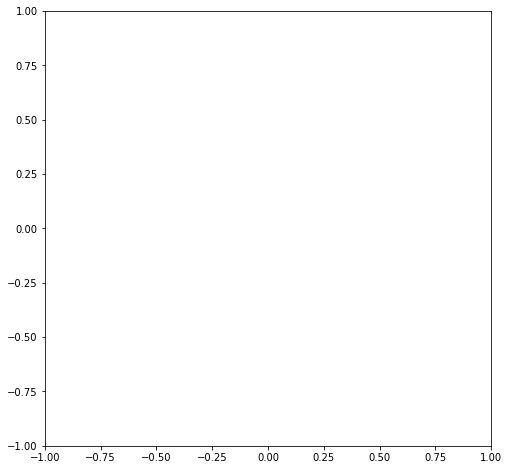

In [9]:
# Correlation circle
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(p):
     plt.annotate(data_tr.columns[j],(corvar[j,0],corvar[j,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()